## TOC:
* [Imports](#1st)
* [Config](#2nd)
* [Data Import](#3rd)
* [2nd visualization](#4th)
* [Train Test Split](#5th)
* [Classifiers](#6th)
* [Results](#7th)


## Imports <a class="anchor" id="1st"></a>

In [249]:
import numpy
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.svm import SVC
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.utils import resample

## Config <a class="anchor" id="2nd"></a>

In [251]:
TRAIN_TEST_SPLIT = True

KNN_CLASSIFIER = True

GP_CLASSIFIER = False # See Notes below GP Classifier

RF_CLASSIFIER = True

SVM_CLASSIFIER = False

MLP_CLASSIFIER = True

OPTIMIZATION = True

## Data Import <a class="anchor" id="3rd"></a>

In [271]:
# Data Read
df_train = pd.read_csv('../../data/processed/employment_train_processed.csv')
df_test = pd.read_csv('../../data/processed/employment_test_processed.csv')
# Check Columns for preprocessing 
print(df_test.columns)
print(df_train.columns)

Index(['Unnamed: 0', 'age', 'race', 'earnwke', 'married', 'union', 'ne_states',
       'so_states', 'ce_states', 'we_states', 'government', 'private', 'self',
       'educ_lths', 'educ_hs', 'educ_somecol', 'educ_aa', 'educ_bac',
       'educ_adv', 'female'],
      dtype='object')
Index(['Id', 'age', 'race', 'earnwke', 'employed', 'unemployed', 'married',
       'union', 'ne_states', 'so_states', 'ce_states', 'we_states',
       'government', 'private', 'self', 'educ_lths', 'educ_hs', 'educ_somecol',
       'educ_aa', 'educ_bac', 'educ_adv', 'female'],
      dtype='object')


In [188]:
#DEBUG print(len(df_train))  

## 2nd visual <a class="anchor" id="4th"></a>

A second look at the data to make sure that the import of the processed data  was successful
And also in case of any changes done to training data to visualize said changes

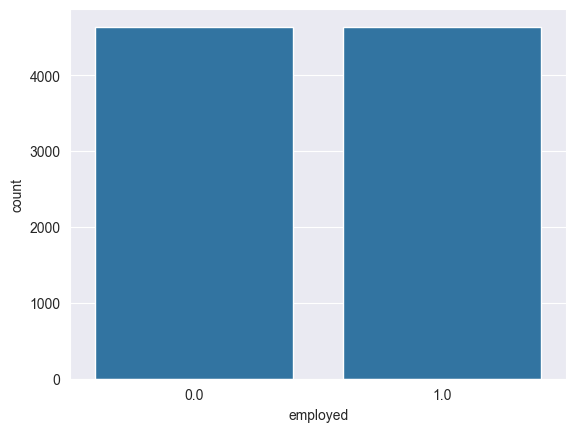

In [310]:
sns.countplot(data=df_train, x="employed")
plt.show()

## Partial Data Preprocesssing <a class="anchor" id="5th"></a>

In [253]:
train = df_train.values

# Shuffle for later cross validation(in this case 5 fold cross validation)
idx = np.arange(train.shape[0])
np.random.seed(7)
np.random.shuffle(idx)
train = train[idx]

df_train = pd.DataFrame(train, columns = df_train.columns)

In [254]:
# List of all "new" columns in case any change due to preprocessing
continuous_cols = ['age', 'race', 'earnwke']
categorical_cols = ['employed', 'unemployed', 'married', 'union', 'ne_states', 'so_states', 'ce_states', 'we_states', 'government', 'private', 'self', 'educ_lths', 'educ_hs',  'educ_somecol', 'educ_aa', 'educ_bac', 'educ_adv', 'female']

#Standard scaler is necessary for most sklearn classifiers
snv = sklearn.preprocessing.StandardScaler()

df_train[continuous_cols] = snv.fit_transform(df_train[continuous_cols])
df_test[continuous_cols] = snv.transform(df_test[continuous_cols])

## Train Test Split <a class="anchor" id="6th"></a>

In [255]:
train = df_train.values
train_ids = train[:, 0]
train_employed = train[:, 4]
train_unemployed = train[:, 5]
train_data = train[:,np.array([not i == 4 and  not i == 5  for i in range(1,23)])]
test = df_test.values 

In [256]:
# Test train split to have meaningful data to train since the given test data does not supply the target features
if TRAIN_TEST_SPLIT:
    temp_train_ids, temp_test_ids, temp_train_data, temp_test_data, temp_train_employed, temp_test_employed = train_test_split(train_ids, train_data, train_employed, test_size=200, random_state=7)
else: temp_train_ids, temp_train_data, temp_test_employed = train_ids, train_data, train_employed

## Classifiers <a class="anchor" id="7th"></a>

The commented out print() statements are remainders of the accuracy scores without cross validation

In [257]:
if KNN_CLASSIFIER:
    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(temp_train_data, temp_train_employed.astype(bool))

In [258]:
if KNN_CLASSIFIER:
    temp_test_employed_pred = knn_classifier.predict(temp_test_data)

    accuracy = model_selection.cross_val_score(knn_classifier, X=train_data, y=train_employed, cv=5, scoring='accuracy')
    knn_min_acc = accuracy.min()
    print(accuracy)
    
    #print("Accuracy",sklearn.metrics.accuracy_score(temp_test_employed.astype(bool), temp_test_employed_pred))
    #print("F1-Score",sklearn.metrics.f1_score (temp_test_employed.astype(bool), temp_test_employed_pred))

[0.82974138 0.81994609 0.8296496  0.8296496  0.83396226]


In [195]:
if GP_CLASSIFIER:
    gaussian_process_classifier = GaussianProcessClassifier()
    gaussian_process_classifier.fit(temp_train_data, temp_train_employed.astype(bool))

In [196]:
if GP_CLASSIFIER:
    temp_test_employed_pred = gaussian_process_classifier.predict(temp_test_data)

    accuracy = model_selection.cross_val_score(gaussian_process_classifier, X=train_data, y=train_employed, cv=5, scoring='accuracy')
    gp_min_acc = accuracy.min()
    print(accuracy)    

    #print("Accuracy",sklearn.metrics.accuracy_score(temp_test_employed.astype(bool), temp_test_employed_pred))
    #print("F1-Score",sklearn.metrics.f1_score (temp_test_employed.astype(bool), temp_test_employed_pred))

## Notes
Error: Unable to allocate 628. MiB for an array with shape (9076, 9076) and data type float64
Gaussian Process set to False because of the size limitation

In [197]:
# Test for python64 or python32
#import struct
#print (struct.calcsize("P") * 8)

In [259]:
if SVM_CLASSIFIER:
    svc = SVC()#kernel='linear'
    svc.fit(temp_train_data, temp_train_employed.astype(bool))

In [260]:
if SVM_CLASSIFIER:
    temp_test_employed_pred = svc.predict(temp_test_data)

    accuracy = model_selection.cross_val_score(svc, X=train_data, y=train_employed, cv=5, scoring='accuracy')
    svc_min_acc = accuracy.min()
    print(accuracy)
    
    #print("Accuracy",sklearn.metrics.accuracy_score(temp_test_employed.astype(bool), temp_test_employed_pred))
    #print("F1-Score",sklearn.metrics.f1_score (temp_test_employed.astype(bool), temp_test_employed_pred))

In [261]:
if RF_CLASSIFIER:
    random_forest_classifier = RandomForestClassifier(n_estimators=40, random_state=6)
    random_forest_classifier.fit(temp_train_data, temp_train_employed.astype(bool))

In [262]:
if RF_CLASSIFIER:
    temp_test_employed_pred = random_forest_classifier.predict(temp_test_data)

    accuracy = model_selection.cross_val_score(random_forest_classifier, X=train_data, y=train_employed, cv=5, scoring='accuracy')
    rf_min_acc = accuracy.min()
    print(accuracy)
    
    #print(sklearn.metrics.accuracy_score(temp_test_employed.astype(bool), temp_test_employed_pred))
    #print("F1-Score",sklearn.metrics.f1_score (temp_test_employed.astype(bool), temp_test_employed_pred))

[0.97952586 0.98598383 0.98328841 0.97520216 0.98167116]


In [263]:
if MLP_CLASSIFIER:
    mlp_classifier = MLPClassifier()
    mlp_classifier.fit(temp_train_data, temp_train_employed.astype(bool))    

In [264]:
if MLP_CLASSIFIER:
    temp_test_employed_pred = mlp_classifier.predict(temp_test_data)

    accuracy = model_selection.cross_val_score(mlp_classifier, X=train_data, y=train_employed, cv=5, scoring='accuracy')
    mlp_min_acc = accuracy.min()
    print(accuracy)

    #print("Accuracy",sklearn.metrics.accuracy_score(temp_test_employed.astype(bool), temp_test_employed_pred))
    #print("F1-Score",sklearn.metrics.f1_score (temp_test_employed.astype(bool), temp_test_employed_pred))

[0.5549569  0.66415094 0.59838275 0.52345013 0.57520216]


In [265]:
if KNN_CLASSIFIER:
    print("KNN:" , knn_min_acc)
if GP_CLASSIFIER:
    print("GP:" , gp_min_acc)
if SVM_CLASSIFIER:
    print("SVM:" , svc_min_acc)
if RF_CLASSIFIER:
    print("RF:" , rf_min_acc)
if MLP_CLASSIFIER:
    print("MLP:" , mlp_min_acc)

KNN: 0.8199460916442048
RF: 0.9752021563342318
MLP: 0.5234501347708895


## Hyperparameter Optimization

Here begins the optimization process for the previous tested classifiers

In [266]:
if KNN_CLASSIFIER and OPTIMIZATION:
    def hyperparameter_function_knn(neighbours):
        """ Function for hyperparameter optimization
        """        
        neighbours = neighbours.round().astype(int)
        knn_classifier = KNeighborsClassifier(n_neighbors=neighbours)#n_neighbors=neighbours
        accuracy = model_selection.cross_val_score(knn_classifier, X=train_data, y=train_employed, cv=5, scoring='accuracy')
        return accuracy.min()

    # Bounded region of parameter space
    pbounds = {'neighbours': (3, 7)}

    optimizer = BayesianOptimization(
        f=hyperparameter_function_knn,
        pbounds=pbounds,
        random_state=17,
        allow_duplicate_points= True
    )   

    optimizer.maximize(
        init_points=50,
        n_iter=100,
    )

|   iter    |  target   | neighb... |
-------------------------------------
| 1         | 0.8253    | 4.179     |
| 2         | 0.8199    | 5.122     |
| 3         | 0.8253    | 3.766     |
| 4         | 0.8787    | 3.272     |
| 5         | 0.7757    | 6.148     |
| 6         | 0.7757    | 5.625     |
| 7         | 0.7757    | 5.55      |
| 8         | 0.8199    | 5.302     |
| 9         | 0.8787    | 3.156     |
| 10        | 0.8253    | 4.431     |
| 11        | 0.765     | 6.783     |
| 12        | 0.8787    | 3.24      |
| 13        | 0.7757    | 6.456     |
| 14        | 0.765     | 6.509     |
| 15        | 0.8787    | 3.205     |
| 16        | 0.7757    | 5.61      |
| 17        | 0.8199    | 5.207     |
| 18        | 0.8199    | 5.39      |
| 19        | 0.8199    | 4.934     |
| 20        | 0.8253    | 4.132     |
| 21        | 0.8253    | 4.191     |
| 22        | 0.8199    | 5.246     |
| 23        | 0.8199    | 4.584     |
| 24        | 0.7757    | 6.155     |
| 25        

In [267]:
if KNN_CLASSIFIER and OPTIMIZATION:
    #optimal values
    neighbours = 3
    
    
    knn_classifier = KNeighborsClassifier(n_neighbors=neighbours)
    accuracy = model_selection.cross_val_score(knn_classifier, X=train_data, y=train_employed, cv=5, scoring='accuracy')
    print(accuracy.min())

0.8787061994609164


In [ ]:
if SVM_CLASSIFIER and OPTIMIZATION:
    def hyperparameter_function_svc(gamma, C):
        """ Function for hyperparameter optimization
        """
        svc = SVC(gamma=gamma, C=C)
        svc.fit(temp_train_data, temp_train_employed.astype(bool))
        temp_test_employed_pred = svc.predict(temp_test_data)
        return sklearn.metrics.accuracy_score(temp_test_employed.astype(bool), temp_test_employed_pred)

    # Bounded region of parameter space
    pbounds = {'gamma': (0, 1.5), 'C': (0.00001, 2)}

    optimizer = BayesianOptimization(
        f=hyperparameter_function_svc,
        pbounds=pbounds,
        random_state=6,
    )

In [168]:
if SVM_CLASSIFIER and OPTIMIZATION:
    optimizer.maximize(
        init_points=50,
        n_iter=100,
    )

In [169]:
if SVM_CLASSIFIER and OPTIMIZATION:
    svc = sklearn.svm.SVC(gamma=2, C=0.3817)
    svc.fit(temp_train_data, temp_train_employed)
    temp_test_employed_pred = svc.predict(temp_test_data)

    print(sklearn.metrics.accuracy_score(temp_test_employed, temp_test_employed_pred))

In [170]:
if MLP_CLASSIFIER and OPTIMIZATION:
    def hyperparameter_function_mlp(lr, hl_w,hl_d ):
        """ Function for hyperparameter optimization
        """
                
        mlp_c = MLPClassifier(learning_rate_init=lr,hidden_layer_sizes=(hl_d,hl_w))
        print(temp_train_data)
        print(temp_train_employed)
        
        mlp_c.fit(temp_train_data, temp_train_employed.astype(bool))        
        temp_test_employed_pred = mlp_c.predict(temp_test_data)      
        return sklearn.metrics.accuracy_score(temp_test_employed.astype(bool), temp_test_employed_pred)


    # Bounded region of parameter space
    pbounds = {'lr': (0.1, 1), 'hl_w': (1, 15),'hl_d':(1, 15)}

    optimizer = BayesianOptimization(
        f=hyperparameter_function_mlp,
        pbounds=pbounds,
        random_state=6,
    )    

In [171]:
if MLP_CLASSIFIER and OPTIMIZATION:    
    optimizer.maximize(
        init_points=50,
        n_iter=100,
    )

In [172]:
if MLP_CLASSIFIER and OPTIMIZATION: 
    mlp_c = MLPClassifier(learning_rate_init=0.1,hidden_layer_sizes=(1,1) )
    mlp_c.fit(temp_train_data, temp_train_employed)
    temp_test_employed_pred = mlp_c.predict(temp_test_data)

    print(sklearn.metrics.accuracy_score(temp_test_employed, temp_test_employed_pred))

IndentationError: expected an indented block (3223136079.py, line 3)

## Data results <a class="anchor" id="8th"></a>

In the previous tests KNeighbourClassifier and the RandomForestClassifier performed the best.  
Therefore we used each for a kaggle upload.
Below is the shown procedure for KNN
 

In [272]:
if KNN_CLASSIFIER:
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(temp_train_data, temp_train_employed.astype(bool))

    temp_test_employed_pred = knn_classifier.predict(temp_test_data)

    accuracy = model_selection.cross_val_score(knn_classifier, X=train_data, y=train_employed, cv=5, scoring='accuracy')
    knn_min_acc = accuracy.min()
    print(accuracy)

[0.88469828 0.8787062  0.88086253 0.89272237 0.89811321]


In [299]:
df_test = pd.read_csv('../../data/processed/employment_test_processed.csv')

In [302]:
best_classifier = knn_classifier

test = df_test.values

final_pred = best_classifier.predict(test)

print(final_pred)

[False False False False False False False  True False False False False
 False False  True  True  True False False False False False False False
 False False False False False False False False  True False False False
 False False False  True False False False False False False False  True
 False  True  True False False False False  True False False False False
 False False False False False False  True  True  True False False False
 False False False False  True  True False  True  True False False False
 False False False False  True False  True  True False False False False
  True False  True False False False  True  True  True  True False False
 False False  True False False False  True False False False  True False
 False  True  True  True False False False  True  True False False  True
 False False False False False  True False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [303]:
df_final = pd.read_csv('../../data/raw/teco-psda-exercisesheet1-employment-2024/employment_test_sample.csv',decimal=",")

print(df_final)

       Id  Category
0      43         1
1      45         1
2      64         1
3      86         1
4      94         1
..    ...       ...
195  5144         1
196  5190         1
197  5296         1
198  5313         1
199  5338         1

[200 rows x 2 columns]


In [309]:
final = df_final.values
for i in range(0,len(final)):
    final[i,1] = final_pred[i]
print(final)

print(final[:,1].sum())

[[  43    0]
 [  45    0]
 [  64    0]
 [  86    0]
 [  94    0]
 [ 105    0]
 [ 115    0]
 [ 129    1]
 [ 241    0]
 [ 254    0]
 [ 382    0]
 [ 394    0]
 [ 442    0]
 [ 483    0]
 [ 532    1]
 [ 540    1]
 [ 543    1]
 [ 550    0]
 [ 602    0]
 [ 671    0]
 [ 705    0]
 [ 721    0]
 [ 746    0]
 [ 769    0]
 [ 774    0]
 [ 837    0]
 [ 860    0]
 [ 885    0]
 [ 918    0]
 [ 968    0]
 [1030    0]
 [1095    0]
 [1185    1]
 [1205    0]
 [1291    0]
 [1301    0]
 [1306    0]
 [1337    0]
 [1353    0]
 [1366    1]
 [1387    0]
 [1396    0]
 [1398    0]
 [1435    0]
 [1476    0]
 [1479    0]
 [1504    0]
 [1525    1]
 [1541    0]
 [1551    1]
 [1560    1]
 [1568    0]
 [1639    0]
 [1650    0]
 [1694    0]
 [1726    1]
 [1753    0]
 [1798    0]
 [1811    0]
 [1822    0]
 [1842    0]
 [1893    0]
 [1915    0]
 [1956    0]
 [1960    0]
 [1971    0]
 [2030    1]
 [2111    1]
 [2176    1]
 [2200    0]
 [2254    0]
 [2258    0]
 [2264    0]
 [2295    0]
 [2327    0]
 [2328    0]
 [2412    1]

In [306]:
df_fine = pd.DataFrame(final, columns = df_final.columns)

df_fine.to_csv('../../data/predictions/employment_test_final.csv',index=False)